# Pytorch vs Tensorflow

## Tensorflow

Tensorflow 2 (released 2019) offers two APIs:
1. Sequential approach (simple) based on Keras library
2. Subclass approach (advanced)

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#### Load training & test data

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [4]:
type(train_images)

numpy.ndarray

In [5]:
train_images.shape # the output should be in form of (samples, dim_y, dim_x, channels)

(50000, 32, 32, 3)

In [6]:
test_images.shape

(10000, 32, 32, 3)

In [7]:
train_labels.shape

(50000, 1)

In [8]:
train_labels[:5,0] # show firt 5 labels

array([6, 9, 9, 4, 1], dtype=uint8)

#### Show data

In [9]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

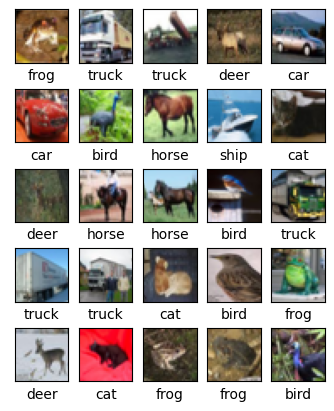

In [10]:
plt.figure(figsize=(4,5)) # size of a single cell (including image and its label)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(classes[train_labels[i][0]])
plt.show()

#### Normalize pixel values to be between 0 and 1

In [11]:
train_images, test_images = train_images / 255.0, test_images / 255.0

#### Model

In [12]:
# Create Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64))

2022-10-25 17:23:17.537649: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-25 17:23:17.537977: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-25 17:23:17.538751: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
# Compile Model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
# Train Model
history = model.fit(x=train_images, y=train_labels, epochs=10, validation_split=0.2)

2022-10-25 17:23:26.847835: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-10-25 17:23:26.869905: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


Epoch 1/10
1250/1250 [==============================] - 51s 40ms/step - loss: 2.0854 - accuracy: 0.2618 - val_loss: 1.4703 - val_accuracy: 0.4628
Epoch 2/10
1250/1250 [==============================] - 44s 35ms/step - loss: 1.4134 - accuracy: 0.4849 - val_loss: 1.3240 - val_accuracy: 0.5234
Epoch 3/10
1250/1250 [==============================] - 44s 35ms/step - loss: 1.2559 - accuracy: 0.5506 - val_loss: 1.1972 - val_accuracy: 0.5741
Epoch 4/10
1250/1250 [==============================] - 37s 29ms/step - loss: 1.1506 - accuracy: 0.5922 - val_loss: 1.1172 - val_accuracy: 0.6082
Epoch 5/10
1250/1250 [==============================] - 52s 41ms/step - loss: 1.0813 - accuracy: 0.6179 - val_loss: 1.0743 - val_accuracy: 0.6241
Epoch 6/10
1250/1250 [==============================] - 54s 43ms/step - loss: 1.0141 - accuracy: 0.6423 - val_loss: 1.0409 - val_accuracy: 0.6367
Epoch 7/10
1250/1250 [==============================] - 53s 42ms/step - loss: 0.9673 - accuracy: 0.6616 - val_loss: 1.0715 -

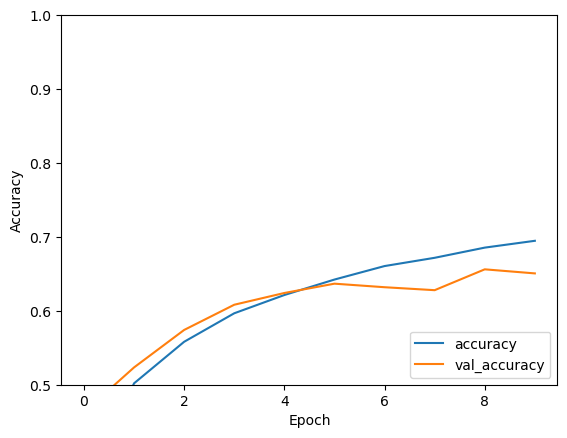

In [15]:
# Print history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#### Test and model evaluation

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
test_loss, test_acc

313/313 - 2s - loss: 1.0236 - accuracy: 0.6503


(1.0236045122146606, 0.6503000259399414)

## PyTorch

PyTorch released in 2016 by Facebook

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt


In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

#### Load data

In [7]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [8]:
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True, num_workers=2)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False, num_workers=2)

1.8%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

4.5%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

7.4%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

12.7%IOPub message rate exceeded.


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


#### Model

In [14]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        # create all layers
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv2 = nn.Conv2d(64, 64, 3)
        self.pool = nn.MaxPool2d(2,2) # max pooling is not trained and can be used multiple time in forward pass
        self.fc1 = nn.Linear(64*4*4, 64)
        self.fc2 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        

In [15]:
model = ConvNet().to(device)

In [16]:
# Loss function and Optimizer
learning_rate = 0.001
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#### Training

In [17]:
epochs = 10
inputs_shape = None
labels_shape = None
print('TRAINING FINISHED')

for epoch in range(epochs):
    running_loss = 0.0
    
    for (inputs, labels) in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # this is only for extra information
        if inputs_shape == None:
            inputs_shape = inputs.shape
        if labels_shape == None:
            labels_shape = labels.shape
        
        # forward pass
        outputs = model(inputs)
        
        # loss function calculation
        loss = loss_function(outputs, labels)
        
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.stap()
        
        running_loss = loss.item()
        
        print(f'EPOCH={epoch + 1}|LOSS={running_loss:.3f}')

print('TRAINING FINISHED')
        

TRAINING FINISHED


RuntimeError: Given groups=1, weight of size [64, 64, 3, 3], expected input[32, 32, 15, 15] to have 64 channels, but got 32 channels instead